In [24]:
import numpy as np

In [4]:
def back_sub(R, b_tilde):
    n = R.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = b_tilde[i]
        for j in range(i+1, n):
            x[i] = x[i] - R[i][j]*x[j]
        x[i] = x[i]/R[i,i]
    return x

def solve_via_backsub(A, b):
    Q, R = np.linalg.qr(A)
    b_tilde = Q.T @ b
    return back_sub(R, b_tilde)
    
def cls_solve_kkt(A, b, C, d):
    m, n = A.shape
    p, n = C.shape
    G = A.T @ A
    KKT = np.vstack([np.hstack([2*G, C.T]), np.hstack([C, np.zeros((p,p))])])
    xzhat = solve_via_backsub(KKT, np.hstack([2*A.T @ b, d]))
    return xzhat[:n]
    
def cls_solve(A, b, C, d):
    m, n = A.shape
    p, n = C.shape
    Q, R = np.linalg.qr(np.vstack([A,C]))
    Q1 = Q[:m,:] # == Q[:3]
    Q2 = Q[m:m+p+1,:]
    Qtil, Rtil = np.linalg.qr(Q2.T)
    w = solve_via_backsub(Rtil, (2*Qtil.T @ (Q1.T @ b)- 2*solve_via_backsub(Rtil.T, d)))
    xhat = solve_via_backsub(R, (Q1.T @ b - Q2.T @ w/2))
    return xhat

In [5]:
import statsmodels.api as sm
faithful = sm.datasets.get_rdataset("faithful")

In [243]:
X = faithful.data.waiting
y = faithful.data.eruptions

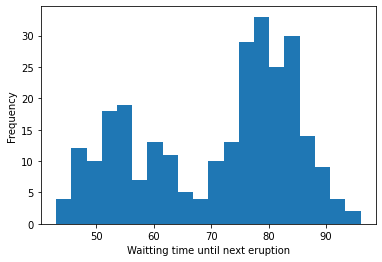

In [14]:
import matplotlib.pyplot as plt
plt.ion()

plt.hist(X, bins=20)
plt.xlabel('Waitting time until next eruption')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Eruption duration')

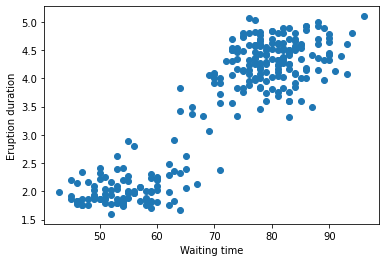

In [121]:
plt.scatter(X, y)
plt.xlabel('Waiting time')
plt.ylabel('Eruption duration')

In [173]:
data = defaultdict(lambda : [])
count = 0
for i in zip(X,y):
    data[i[0]].append(i[1])
    count += 1

In [137]:
from collections import defaultdict

In [192]:
for i in sorted(data):
    for j in data[i]:
        xy = np.vstack((xy, np.array([i,j])))
    

In [225]:
M = len(y)
n1 = 98
n2 = M - n1

In [201]:
X1 = xy[1:,0]
y = xy[1:,1]

True

In [204]:
y[103]

4.1

In [235]:
A = np.vstack((A3, A4))
b = np.array(y)
C = np.array([[1, -69, -1, -69]])
d = np.zeros(1)


In [236]:
A1 = np.column_stack((np.ones(n1), X1[:n1]))
A2 = np.column_stack((np.ones(n2), X1[n1:]))
A3 = np.column_stack((A1, np.zeros((n1, 2))))
A4 = np.column_stack((np.zeros((n2, 2)), A2))

In [237]:
theta = cls_solve(A, b, C, d)
theta

array([ 2.89963329, -0.01484855,  1.74918745,  0.03152168])

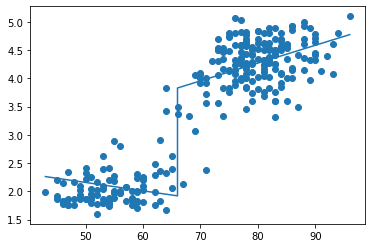

In [238]:
plt.scatter(X1, y)
plt.plot(X1, A @ theta)

In [239]:
np.linalg.norm(A@theta -y)/np.linalg.norm(y)

0.11374556385052556

In [246]:
X = sm.add_constant(X)
X.head()
modelW0 = sm.OLS(y, X)
resultsW0 = modelW0.fit()
resultsW0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 20 May 2021   Prob (F-statistic):          8.13e-100
Time:                        01:57:15   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
import numpy as np
np.linalg.norm(y - resultsW0.predict(X))/np.linalg.norm(y)

0.13482300860953775

The weird looking local regression decreases relative rmse by 2 %!
It's weird!